### Fourier Transform codes by Tim

/var/folders/99/9cwbfz5j6k53ww3dxfzfrk500000gn/T/ipykernel_18589/1424941417.py:26: RuntimeWarning: invalid value encountered in sqrt
  amp = np.sqrt(sc) * fct


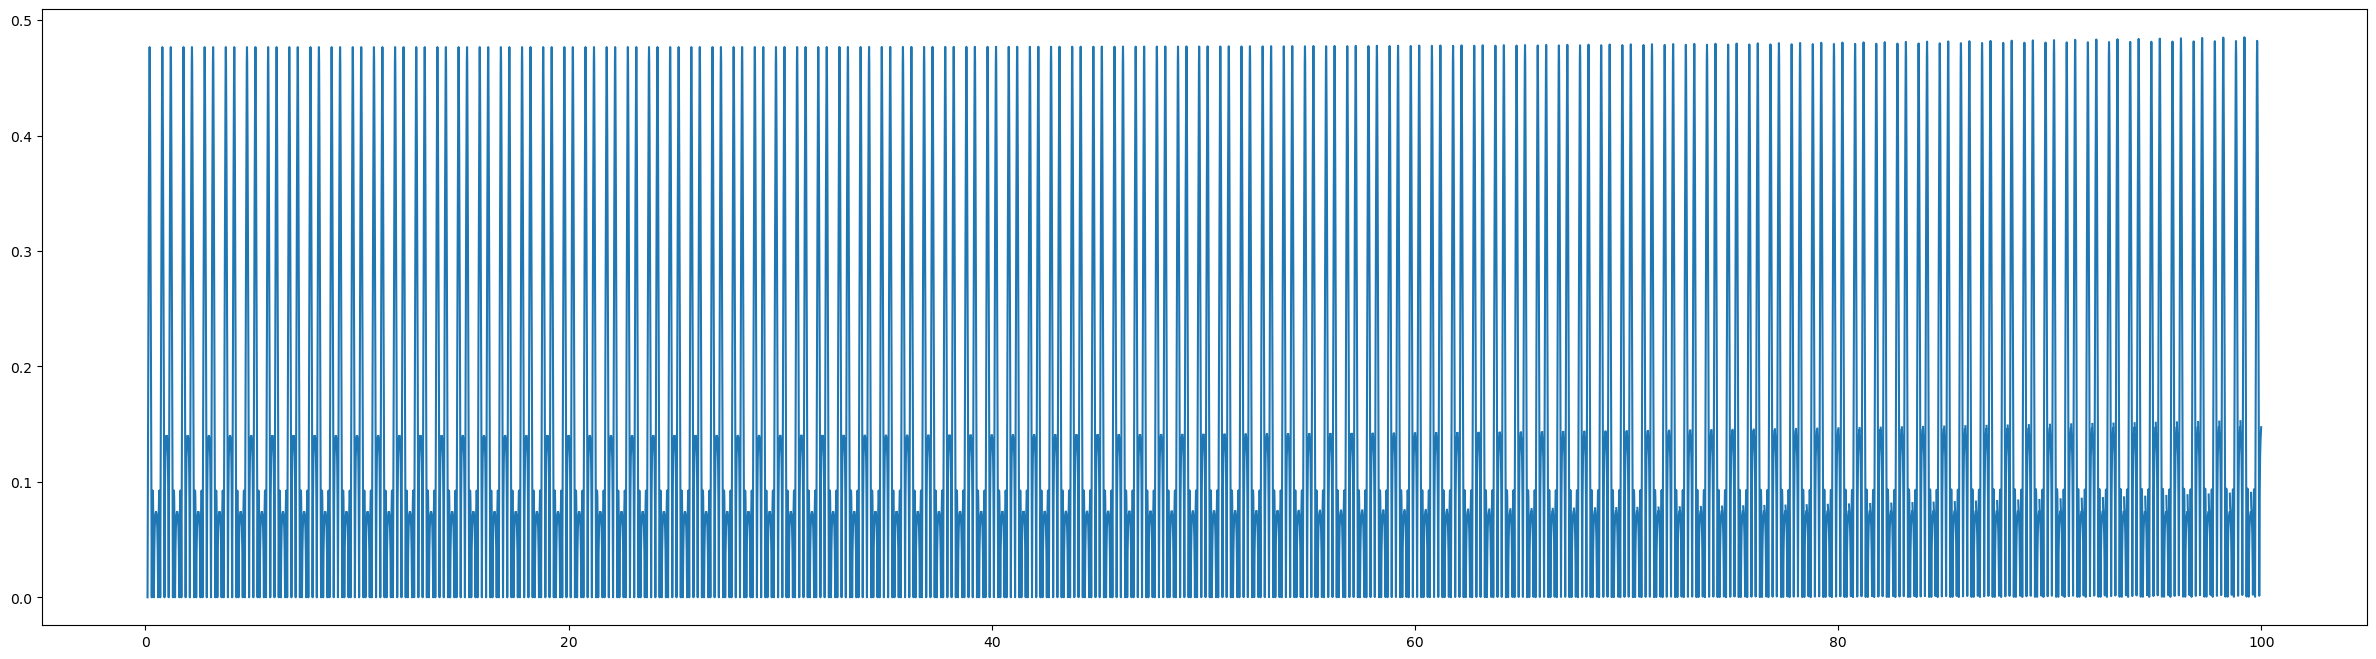

In [2]:
# The time and flux variables are dummy data.

from astropy.timeseries import LombScargle
import numpy as np
import matplotlib.pyplot as plt

# Simple time points (in days)
time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Flux: simple sinusoidal variation with no noise
flux = 1.0 + 0.5 * np.sin(2 * np.pi * time / 5)  # period = 5 days

def calc_lomb_scargle(t,y):
    oversample = 10 # can be adjusted
    tmax = t.max()
    tmin = t.min()
    df = 1.0 / (tmax - tmin)
    fmin = df
    fmax = 100 # set max freq in c/d

    freq = np.arange(fmin, fmax, df / oversample)
    model = LombScargle(t, y)
    sc = model.power(freq, method="fast", normalization="psd")

    fct = np.sqrt(4./len(t))
    amp = np.sqrt(sc) * fct
    return freq, amp # freq in cycles per day and amp in fractional variation

freq, amp = calc_lomb_scargle(time, flux)
plt.figure(figsize = (30, 8))
plt.plot(freq, amp)

### Extracting the catalogue of stars from sector 91 and 92

In [3]:
import pandas as pd

csv_path = '../data/sector_91_92.csv'  

df = pd.read_csv(csv_path)

# print(df.head())
df[:30]


,TICID,Camera,CCD,Tmag,RA,Dec,sector,count
0,175934060,3,3,-1.68,247.3518,-26.4319,91,1
1,152859121,3,4,1.50,249.2898,-10.5669,91,1
2,178999156,1,1,1.96,201.2979,-11.1615,91,1
3,83852015,4,2,2.10,260.5024,-24.9997,91,1
4,465992580,1,1,2.28,286.7346,-27.6722,92,1
5,114746467,2,2,2.29,305.2531,-14.7814,92,1
6,12725034,3,3,2.38,240.0833,-22.6220,91,1
7,188072230,2,3,2.42,287.4410,-21.0239,92,1
8,400036304,4,1,2.45,257.5948,-15.7242,91,1
9,442255852,1,2,2.49,284.4328,-21.1068,92,1


In [6]:
# Rank the star by magnitude (from brightest to faintest)

df.sort_values(by='Tmag', ascending=True)

df[0:20]

,TICID,Camera,CCD,Tmag,RA,Dec,sector,count
0,175934060,3,3,-1.68,247.3518,-26.4319,91,1
1,152859121,3,4,1.50,249.2898,-10.5669,91,1
2,178999156,1,1,1.96,201.2979,-11.1615,91,1
3,83852015,4,2,2.10,260.5024,-24.9997,91,1
4,465992580,1,1,2.28,286.7346,-27.6722,92,1
5,114746467,2,2,2.29,305.2531,-14.7814,92,1
6,12725034,3,3,2.38,240.0833,-22.6220,91,1
7,188072230,2,3,2.42,287.4410,-21.0239,92,1
8,400036304,4,1,2.45,257.5948,-15.7242,91,1
9,442255852,1,2,2.49,284.4328,-21.1068,92,1


### Testing Lightkurve package

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 91 2025    QLP     200   152859121      0.0


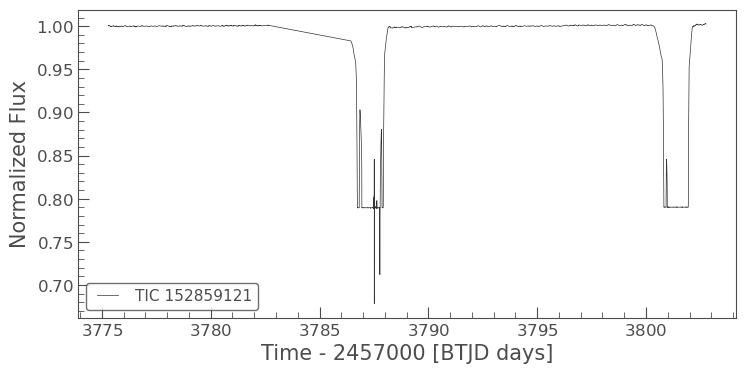

In [19]:
import lightkurve as lk
import matplotlib.pyplot as plt

tic_id =  '152859121'

# Search TESS lightcurves by TIC ID
search_result = lk.search_lightcurve(f'TIC {tic_id}', mission='TESS')

# Check what data is available
print(search_result)

# Download the first lightcurve available
lc = search_result.download(quality_bitmask='default')  # removes bad data points

# Plotting
lc.plot()

# Save image
plt.savefig('../data/lk_152859121.png')